### Overview pet project. Dataset from Kaggle and some information about him.

Taken from Kaggle: "*It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.*"

# 1. Import of necessary libraries

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score,log_loss, classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

In [252]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [253]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [254]:
print(f'Size of dataset, rows = {data.shape[0]}, columns = {data.shape[1]}')

Size of dataset, rows = 284807, columns = 31


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [256]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [257]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 2. Exploratory data analysis

Hypotheses:

- The higher the transfer amount, the more likely it is to be a fraudulent transaction
- Check correlation between factors
- You can create a model for fraud detection based on the attributes provided. Using the 'Class' series as the target variable, using logistic regression.

## 2.1 Target

First, we need to examine the target variable

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

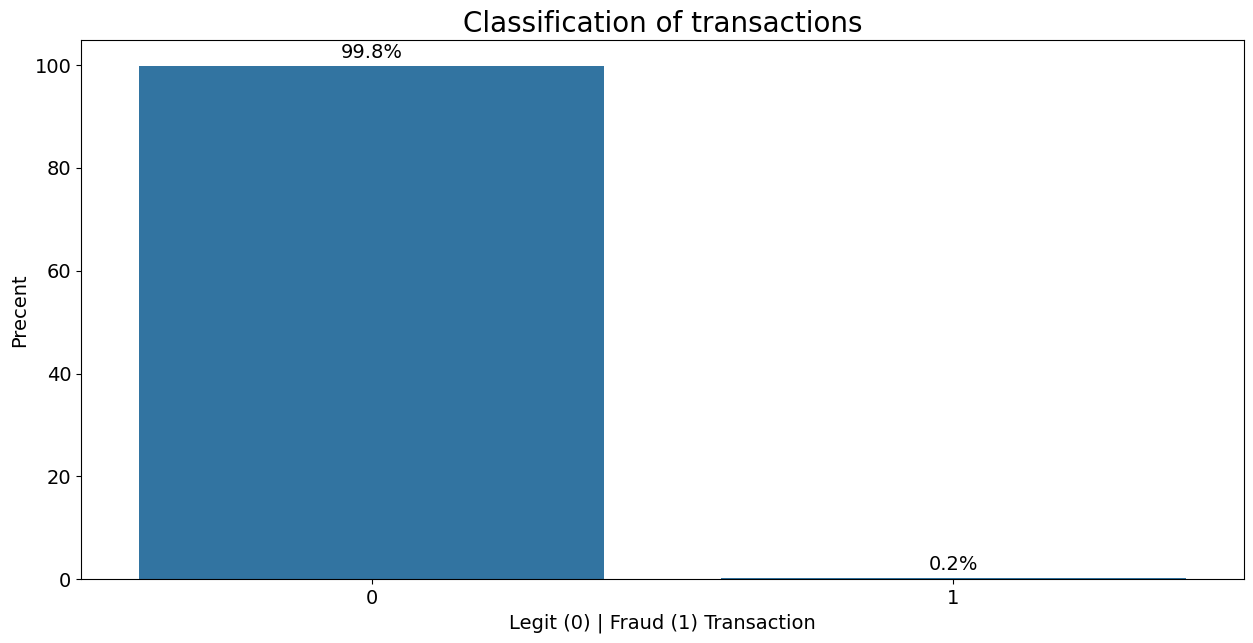

In [258]:
norm_target = (data['Class']
                              .value_counts(normalize=True)
                              .mul(100)
                              .rename('percent')
                              .reset_index())

plt.figure(figsize=(15,7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage,
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center',
              va = 'center',
              xytext = (0, 10),
              textcoords = 'offset points',
              fontsize = 14)

plt.title('Classification of transactions', fontsize = 20)
plt.xlabel('Legit (0) | Fraud (1) Transaction', fontsize = 14)
plt.ylabel('Precent', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

The dataset is completely unbalanced. Almost all transactions are legit and not fraudulent, but also 0.2% is not that low for fraudulent transactions.

In [259]:
print(f"{round(len(data[data['Class'] == 1]) / len(data[data['Class'] == 0]) * 100, 6)}% - Percentage of fraudulent transfers.")

0.173048% - Percentage of fraudulent transfers.


In [260]:
data['Class'].unique()

array([0, 1])

In [261]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Having received this answer, we can conclude that our dataset is highly unbalanced, hence it may affect the subsequent analysis and predictive model.

The "Class" column consists of:
- 0: Normal transaction
- 1: Fraudulent transaction

In [262]:
legit_tr = data[data['Class'] == 0]
fraud_tr = data[data['Class'] == 1]

In [263]:
legit_tr.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [264]:
fraud_tr.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1


In [265]:
print(legit_tr.shape)
print(fraud_tr.shape)

(284315, 31)
(492, 31)


## 2.2 Amount

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 ]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0005, '0.0005'),
  Text(0, 0.001, '0.0010'),
  Text(0, 0.0015, '0.0015'),
  Text(0, 0.002, '0.0020'),
  Text(0, 0.0025, '0.0025'),
  Text(0, 0.003, '0.0030'),
  Text(0, 0.0035, '0.0035'),
  Text(0, 0.004, '0.0040')])

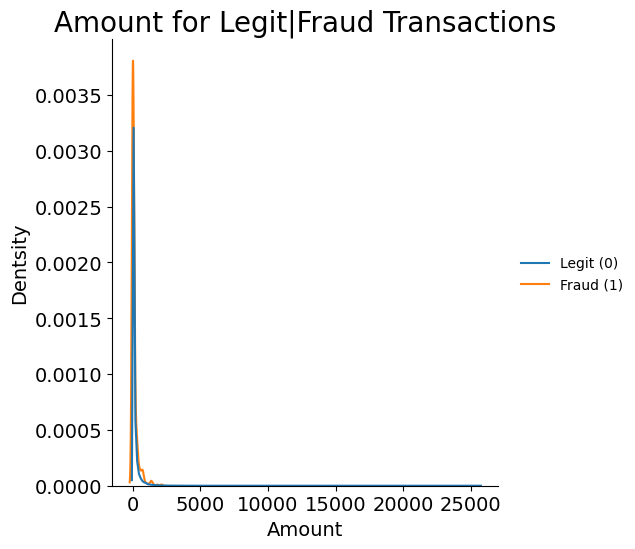

In [266]:
sns.displot(
    {
        "Legit (0)": data[data['Class'] == 0]['Amount'],
        "Fraud (1)": data[data['Class'] == 1]['Amount']
    }, kind = "kde",
    common_norm=False # independent normalization of each subset
)

plt.title('Amount for Legit|Fraud Transactions', fontsize = 20)
plt.xlabel('Amount', fontsize = 14)
plt.ylabel('Dentsity', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225')])

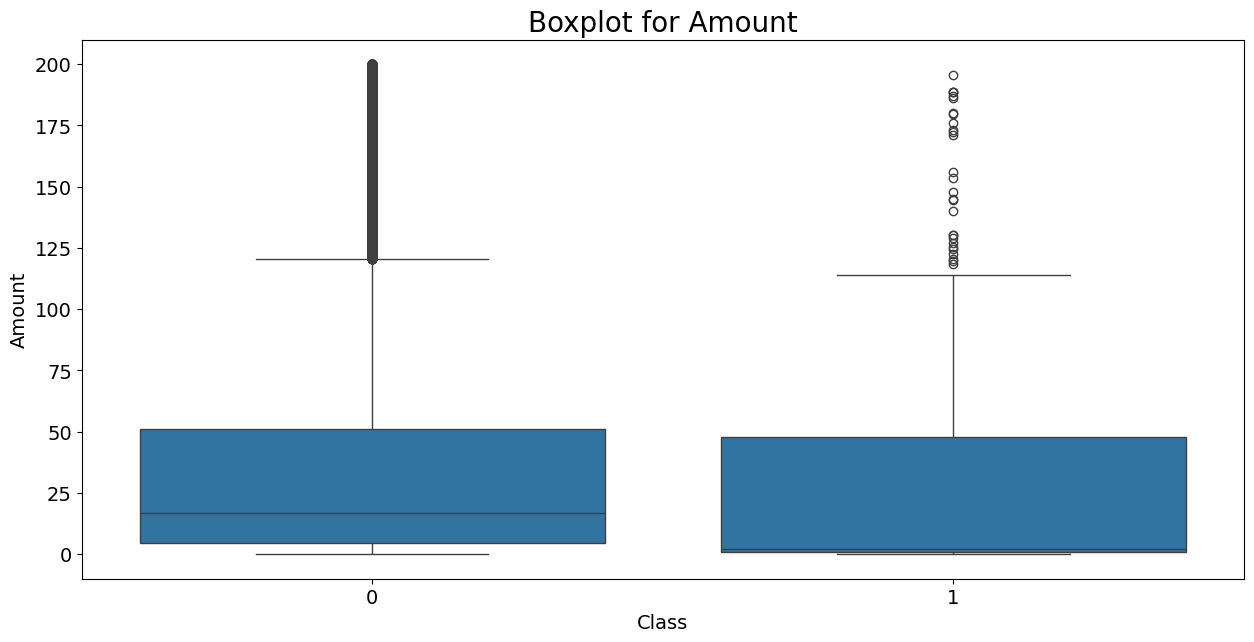

In [267]:
plt.figure(figsize=(15,7))

sns.boxplot(x='Class', y='Amount', data=data[data['Amount'] < 200])

plt.title('Boxplot for Amount', fontsize = 20)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Class', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [268]:
legit_tr['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [269]:
fraud_tr['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## 2.3 Corr

In [270]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


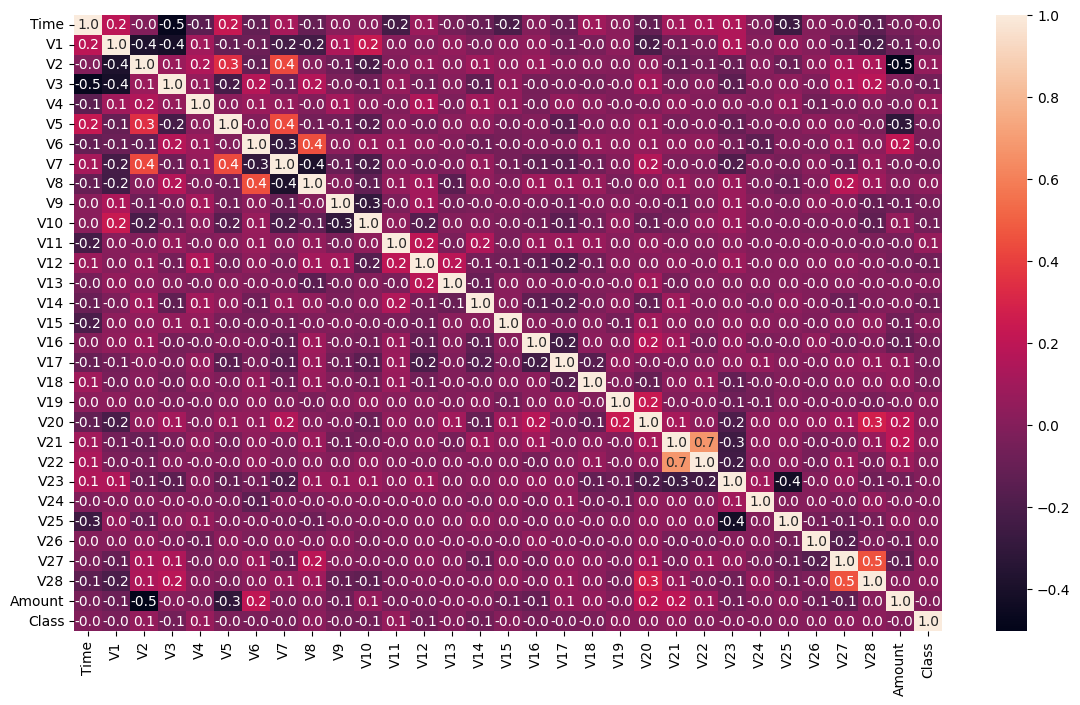

In [271]:
plt.figure(figsize=(14, 8))
sns.heatmap(data
            .corr(method='spearman'),
            annot=True, fmt=".1f");

## 2.4 Histograms of various features

Text(0.5, 0.98, 'Histograms of various features')

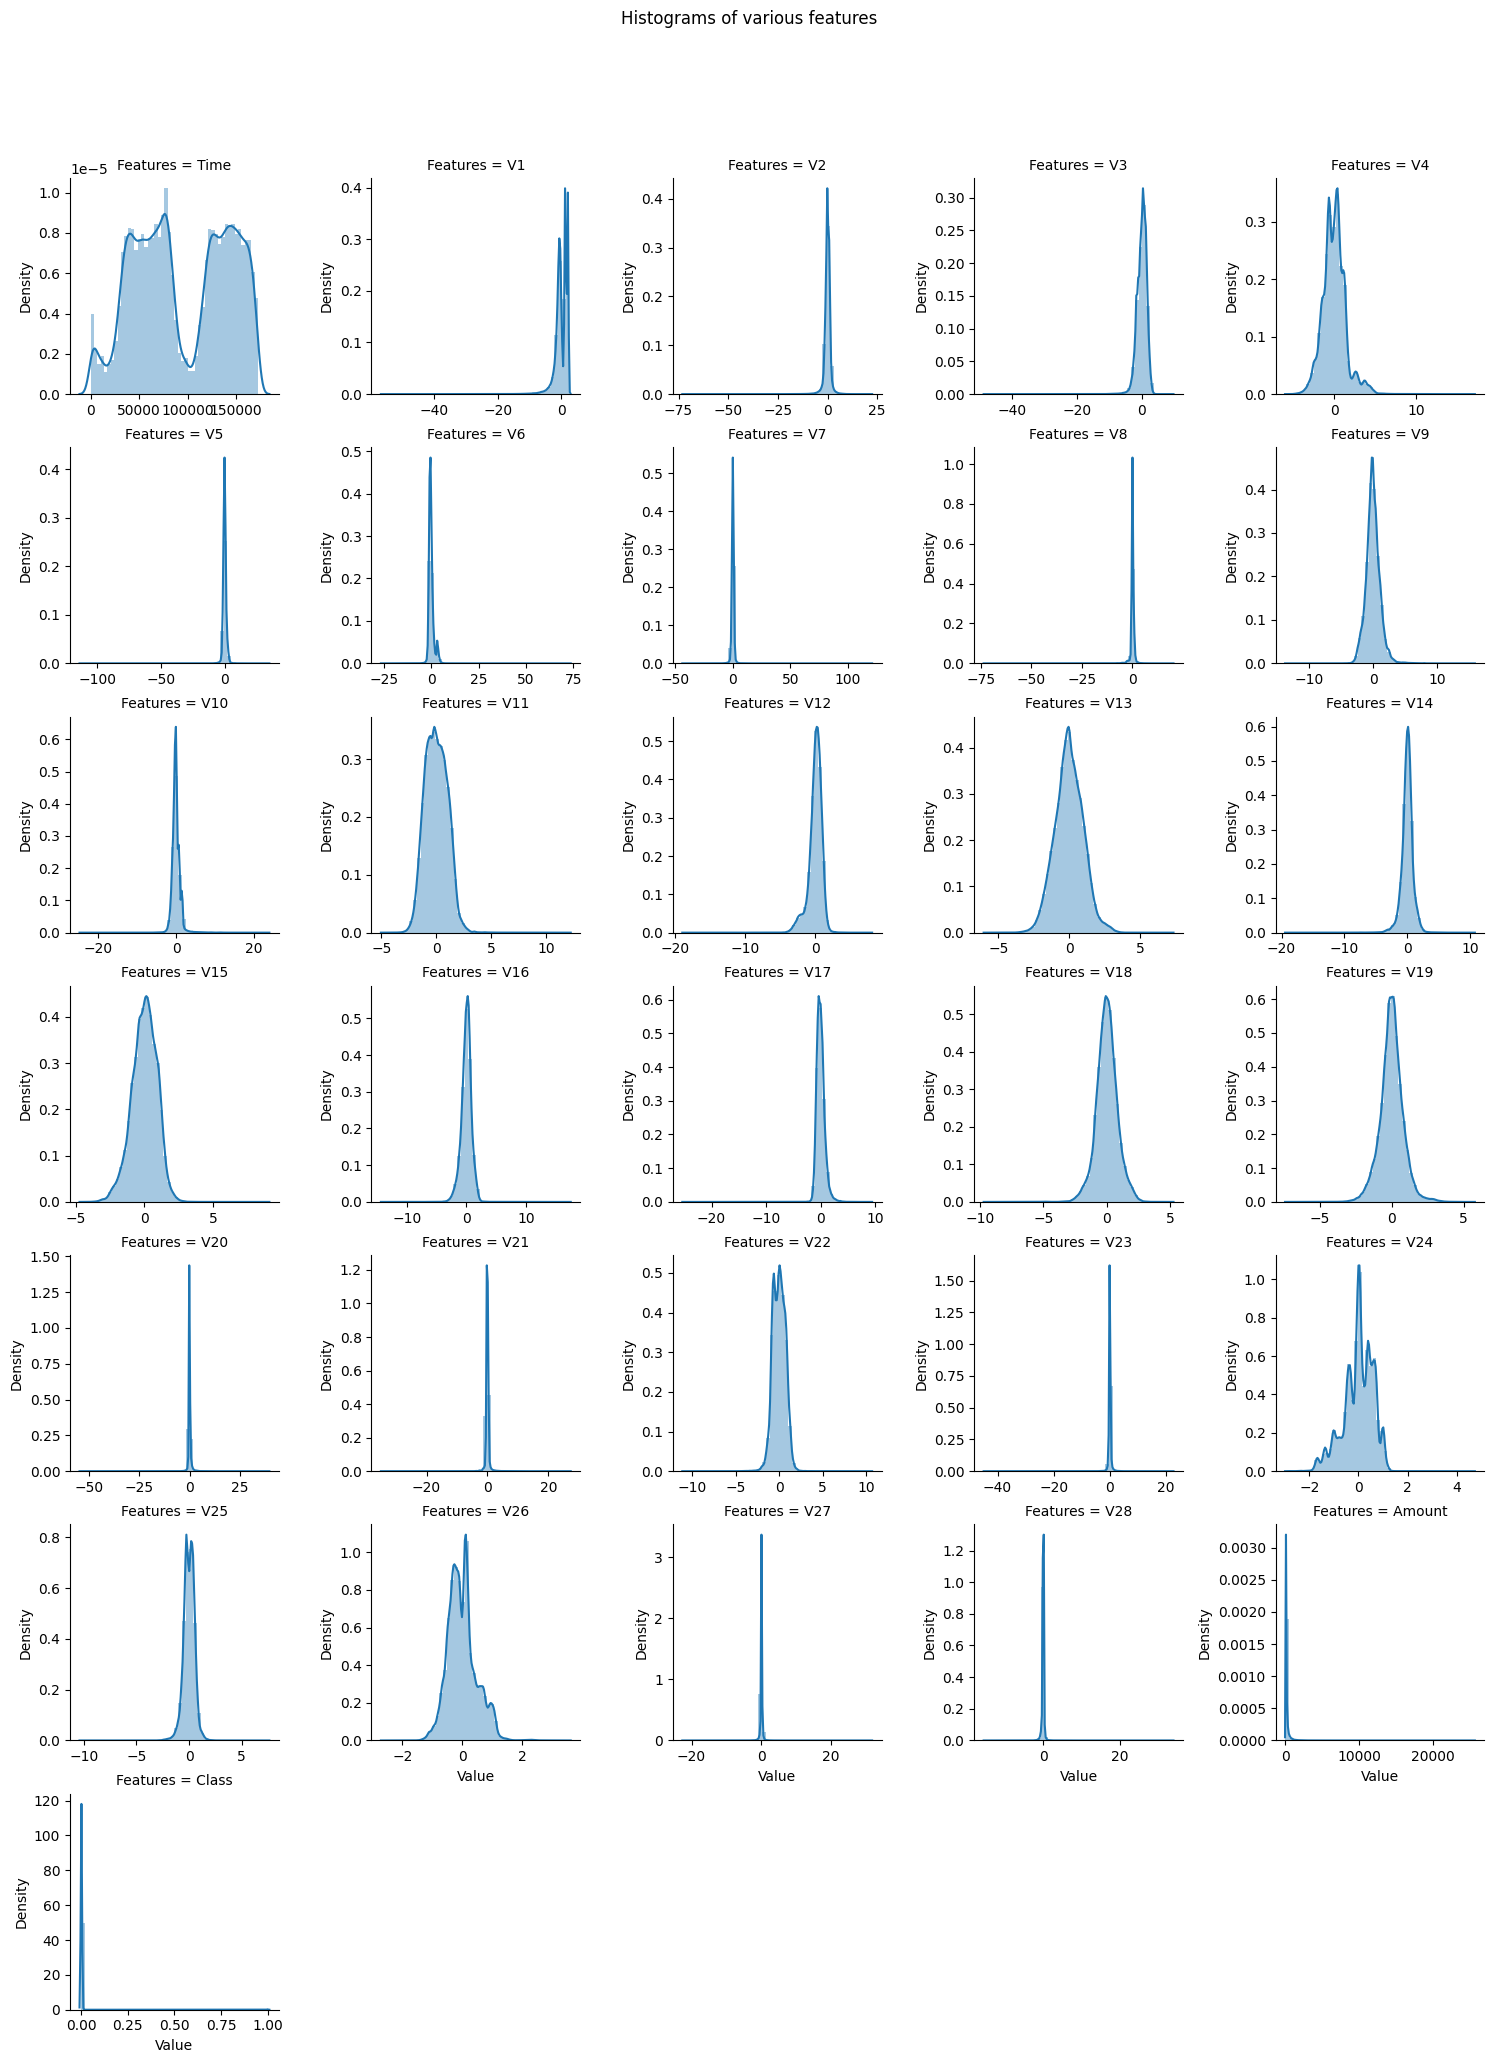

In [272]:
numeric_features = data.copy()
numeric_features = numeric_features.stack().reset_index().rename(columns = {
                                            "level_1": "Features",
                                            0: "Value"
                                        })

ax = sns.FacetGrid(data=numeric_features, col="Features",
                   col_wrap=5, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")
plt.subplots_adjust(top=.9)
plt.suptitle("Histograms of various features")

# 3. Modeling

In [273]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-sampling

Let's build models containing the same distribution of normal and fraudulent transactions

Number of fraudulent transactions: 492

In [274]:
legit_sample_tr = legit_tr.sample(n=492)

In [275]:
new_data = pd.concat([legit_sample_tr, fraud_tr], axis=0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
34595,37742.0,1.111925,-0.225603,1.215669,0.795451,-1.047898,-0.282427,-0.507111,-0.004108,0.771621,...,-0.059507,-0.012097,-0.011179,0.472673,0.255196,0.414165,0.008802,0.034871,47.80,0
280572,169618.0,-1.323687,0.657253,2.017181,4.496723,0.612310,1.525726,0.216205,0.250439,-1.876055,...,0.157283,0.913146,0.005791,0.819267,0.510479,0.650311,0.020135,0.015116,75.64,0
282551,170978.0,-0.607229,-0.213020,1.504027,-1.659201,0.824721,1.460609,-0.517580,0.719333,0.941191,...,0.414083,1.261268,0.117901,-0.524399,-1.236701,0.376000,0.226953,0.225561,6.90,0
119641,75528.0,1.225191,0.135850,0.950371,0.633419,-0.747712,-0.703140,-0.271905,-0.122045,0.228900,...,-0.075037,-0.163191,0.080949,0.432299,0.194401,0.209839,0.000089,0.028726,5.99,0
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99,0


In [276]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [277]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [278]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96016.575203,0.025777,0.056235,0.036450,0.115230,-0.031382,0.051945,0.071517,0.063421,0.065631,...,-0.036001,0.030793,0.029842,0.015593,0.03215,0.036514,0.003590,-0.014934,-0.010118,87.139411
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [279]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

print(X)

            Time        V1        V2        V3        V4        V5        V6  \
34595    37742.0  1.111925 -0.225603  1.215669  0.795451 -1.047898 -0.282427   
280572  169618.0 -1.323687  0.657253  2.017181  4.496723  0.612310  1.525726   
282551  170978.0 -0.607229 -0.213020  1.504027 -1.659201  0.824721  1.460609   
119641   75528.0  1.225191  0.135850  0.950371  0.633419 -0.747712 -0.703140   
251657  155444.0  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [280]:
print(Y)

34595     0
280572    0
282551    0
119641    0
251657    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [281]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=2)

In [282]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


## 4.1 Baseline

Let's check Logistic Regression and Accuracy on Training data

In [283]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:, 1]

In [284]:
print('roc-auc: ', roc_auc_score(Y_test, y_score))
print('precision: ', precision_score(Y_test, y_pred))
print('recall: ', recall_score(Y_test, y_pred))
print('f1: ', f1_score(Y_test, y_pred))
print('logloss: ', log_loss(Y_test, y_pred))

roc-auc:  0.9777365491651205
precision:  0.967032967032967
recall:  0.8979591836734694
f1:  0.9312169312169313
logloss:  2.3785151982666144


In [285]:
metrics = pd.DataFrame(
    index = ['roc-auc', 'precision', 'recall', 'f1', 'logloss']
)

metrics['Baseline_LR'] = [
    roc_auc_score(Y_test, y_score),
    precision_score(Y_test, y_pred),
    recall_score(Y_test, y_pred),
    f1_score(Y_test, y_pred),
    log_loss(Y_test, y_pred)
]

metrics

,Baseline_LR
roc-auc,0.977737
precision,0.967033
recall,0.897959
f1,0.931217
logloss,2.378515


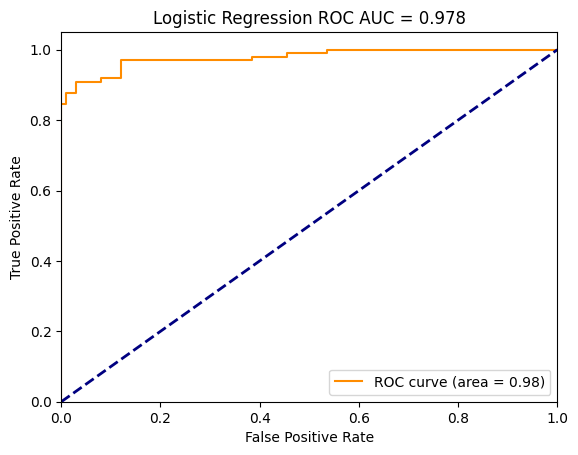

In [286]:
fpr, tpr, thresholds = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc = "lower right")
plt.show()

Let's analyze our resulting model:

- ROC-AUC: 0.9777. A ROC-AUC value close to 1 indicates a high ability of the model to discriminate between classes. Our model shows excellent performance in this regard.

- Precision: 0.9670. Precision measures the accuracy of the model's predictions relative to the class it predicts as positive. A value of 0.9670 indicates that most of the objects that the model predicts as positive are indeed positive. A high precision is important, especially when false positives can have serious consequences.

- Recall: 0.8980. Recall measures the model's ability to detect all real positive cases. A value of 0.8980 indicates that the model can detect about 91.89.8% of all fraudulent transactions.

- F1 Score: 0.9312. F1 Score is a weighted average metric between precision and recall. A value of 0.9312 indicates a good balance between precision and completeness.

- Log Loss: 2.3785. Log Loss measures the performance of the model with respect to the confidence in its predictions. Minimizing log loss is the goal. Our model has a relatively low log loss, which is good.

Overall, the metrics obtained show that our model is highly effective in the task of fraudulent transaction detection, but we should not forget that we had to make it balanced to get this result.

# 4. Analyzing important attributes (shap)

In [287]:
pip install shap

In [288]:
import shap

In [289]:
explainer = shap.LinearExplainer(lr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

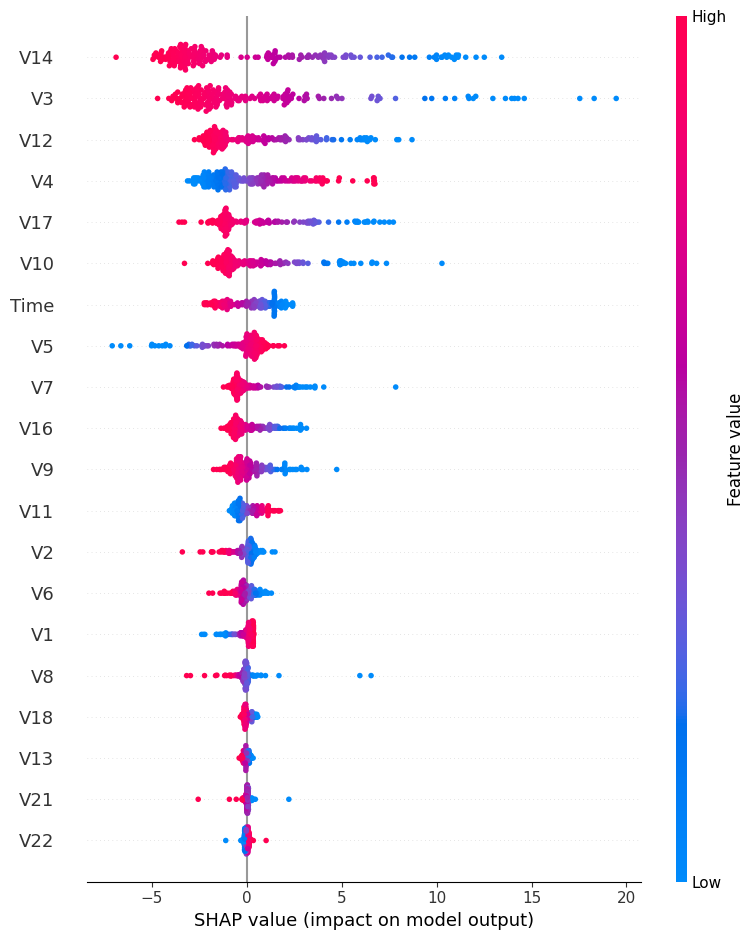

In [290]:
shap.summary_plot(shap_values, X_test)

The features are arranged by their degree of importance along the OY axis, the OX axis is the Shepley value. Each point is a separately taken observation.

The color indicates the values of the corresponding attribute: red - high, blue - low.


In [291]:
lr.coef_

array([[-2.81498572e-05,  8.54434948e-02, -1.66815109e-01,
        -7.09588001e-01,  7.00847489e-01,  3.44239598e-01,
        -2.73418732e-01, -1.91594295e-01, -1.60203796e-01,
        -3.89082076e-01, -4.62488542e-01,  2.12107009e-01,
        -5.59708855e-01, -1.23785035e-01, -1.02541044e+00,
        -6.30824089e-02, -2.69512995e-01, -3.73073792e-01,
        -7.08901792e-02,  6.16051115e-02, -3.12297505e-02,
        -9.54916487e-02,  1.23552243e-01, -1.12177864e-01,
        -1.34706177e-02, -9.55441721e-02, -3.26479460e-02,
         5.09839923e-03, -5.87654263e-03,  7.51182855e-04]])

In [292]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending = False)
feature_imp

,feature,imp
4,V4,0.700847
5,V5,0.344240
11,V11,0.212107
22,V22,0.123552
1,V1,0.085443
19,V19,0.061605
27,V27,0.005098
29,Amount,0.000751
0,Time,-0.000028
28,V28,-0.005877


Model weights